In [7]:
!pip install seaborn

In [8]:
import pandas as pd 
import numpy as np 
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt
import seaborn as sns   


In [9]:
df = pd.read_csv("data/IND_train.csv") 
df.head()

,Event ID,Event Date,Event Type,Event Intensity,Quad Code,Contexts,Actor Name,Actor Country,Actor Title,Actor Name Raw,Recipient Name,Recipient Country,Recipient Title,Recipient Name Raw,Country,Raw Placename,Publication Date,Language,Version
0,20220103-7002-44B0A250B288_Threaten,2022-01-03,Threaten,-3.5,Verbal Conflict,NaN,Shiromani Akali Dal,India,Political Party,Shiromani Akali Dal,Banwarilal Purohit,India,Governor,Banwarilal Purohit,IND,Punjab,2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
1,20220103-4607-958Df4912178_Accuse,2022-01-03,Accuse,-3.0,Verbal Conflict,NaN,Akhilesh Yadav,India,Party President,Akhilesh Yadav,Bharatiya Janata Party,India,Political Party,Bjp,IND,Uttar Pradesh,2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
2,20220103-7081-4Acc724Fc09F_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,Calcutta,2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
3,20220103-0203-15D6B4304172_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,Calcutta,2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
4,20220103-1956-A30E4Dd4B371_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,Calcutta,2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001


In [27]:
places = df["Raw Placename"].value_counts().to_frame().reset_index()
places.head(50)
list(places['Raw Placename'])

['Delhi',
 'Punjab',
 'Karnataka',
 'Bihar',
 'Maharashtra',
 'Rajasthan',
 'West Bengal',
 'Gujarat',
 'Uttar Pradesh',
 'New Delhi',
 'Mumbai',
 'Calcutta',
 'Punjab; Haryana',
 'Madhya Pradesh',
 'Jharkhand',
 'Manipur',
 'Kerala',
 'Lucknow',
 'Bengaluru',
 'Patna',
 'Assam',
 'India',
 'Bombay',
 'Chandigarh',
 'Goa',
 'Allahabad',
 'Himachal Pradesh',
 'Haryana; Punjab',
 'Tamil Nadu',
 'Haryana',
 'Chhattisgarh',
 'Ranchi',
 'Kolkata',
 'Supreme Court',
 'Lok Sabha',
 'Ayodhya',
 'Pune',
 'Tihar Jail',
 'Muzaffarnagar',
 'Guwahati',
 'Shimla',
 'Rajya Sabha',
 'Varanasi',
 'Jaipur',
 'Uttarakhand',
 'Up',
 'Jantar Mantar',
 'Hyderabad',
 'Surat',
 'Ludhiana',
 'Mohali',
 'Bhopal',
 'Ahmedabad',
 'Udaipur',
 'Jammu; Kashmir',
 'Delhi Assembly',
 'Jagdalpur',
 'Lakshadweep',
 'Wayanad',
 'Madras',
 'Raipur',
 'Delhi Police',
 'Telangana',
 'Faridkot',
 'Prayagraj',
 'Kashmir; Jammu',
 'Haridwar',
 'Central Delhi',
 'Jodhpur',
 'Kurukshetra',
 'Kannur',
 'Mantralaya',
 'Bengal',
 '

In [28]:
#creating a dictionary for states 
places_dict = {'Delhi':'DL',
 'Punjab': 'PB',
 'Karnataka':'KA',
 'Bihar':'BR',
 'Maharashtra':'MH',
 'Rajasthan':'RJ',
 'West Bengal': 'WB',
 'Gujarat':'GJ',
 'Uttar Pradesh':'UP',
 'New Delhi': 'DL',
 'Mumbai': 'MH',
 'Calcutta': 'WB',
 'Punjab; Haryana': 'PB;HR',
 'Madhya Pradesh': 'MP',
 'Jharkhand': 'JH',
 'Manipur': 'MN',
 'Kerala': 'KL',
 'Lucknow': 'UP',
 'Bengaluru': 'KA',
 'Patna': 'BR',
 'Assam': 'AS',
 'India': 'IN',
 'Bombay': 'MH',
 'Chandigarh': 'CH',
 'Goa': 'GA',
 'Allahabad': 'UP',
 'Himachal Pradesh': 'HP',
 'Haryana; Punjab': 'PB;HR',
 'Tamil Nadu': 'TN',
 'Haryana': 'HR',
 'Chhattisgarh': 'CG',
 'Ranchi': 'JH',
 'Kolkata': 'WB',
 'Supreme Court': 'DL',
 'Lok Sabha': 'DL',
 'Ayodhya': 'UP',
 'Pune': 'MH',
 'Tihar Jail': 'DL',
 'Muzaffarnagar': 'BR',
 'Guwahati': 'AS',
 'Shimla': 'HM',
 'Rajya Sabha': 'DL',
 'Varanasi': 'UP',
 'Jaipur': 'RJ',
 'Uttarakhand': 'UK',
 'Up': 'UP',
 'Jantar Mantar': 'DL',
 'Hyderabad': 'TG',
 'Surat': 'GJ',
 'Ludhiana': 'PB',
 'Mohali': 'PB',
 'Bhopal': 'MP',
 'Ahmedabad': 'GJ',
 'Udaipur': 'RJ',
 'Jammu; Kashmir': 'JK',
'Delhi Assembly': 'DL',
"Jagdalpur": "CG",
"Lakshadweep": "LD",
"Wayanad": "KL",
"Madras": "TN",
"Raipur": "CG",
"Delhi Police": "DL",
"Telangana": "TG",
"Faridkot": "PB",
"Prayagraj": "UP",
"Kashmir; Jammu": "JK",
"Haridwar": "UK",
"Central Delhi": "DL",
"Jodhpur": "RJ",
"Kurukshetra": "HR",
 "Kannur": "KL",
  "Mantralaya": "MH",
  "Bengal": "WB",
  "Mainpuri": "UP",
  "Goregaon": "MH",
  "Calcutta High Court": "WB",
  "Pathankot": "PB",
  "Navi Mumbai": "MH",
  "Rajasthan 'S Pali": "RJ",
  "Kashmir": "JK",
  "Odisha": "OR",
  "Jalandhar": "PB",
  "Rampur; Azamgarh": "UP",
  "Khatkar Kalan": "PB",
  "Ghaziabad": "UP",
  "Bundi": "RJ",
  "Dehradun": "UK",
  "Tripura": "TR",
"Patiala": "PB",
  "Azamgarh": "UP",
  "India Gate": "DL",
  "Dharamshala": "HP",
  "Rampur": "UP",
  "Amritsar": "PB",
  "Mathura": "UP",
  "Red Fort": "DL",
  "Asansol": "WB",
  "Ballard Estate": "MH",
  "Raj Bhavan": "MH",
  "Enforcement Directorate": "DL",
  "Kochi": "KL",
  "Fatehgarh Sahib": "PB",
  "Thane": "MH",
  "Abohar": "PB",
  "Indira Gandhi Pratishthan": "UP",
  "Ajmer": "RJ",
  "Saharanpur": "UP",
  "Barri Village": "PB",
 'Capital': 'DL',
  "Ladakh": "LA",
  "Chennai": "TN",
 'Punjab Court; Haryana Court': 'PB;HR',
"Bharatpur": "RJ",
  "Meghalaya": "ML",
  "J&K": "JK",
  "Election Commission Of India": "DL",
  "Civil Lines": "DL",
  "Jammu": "JK",
  "Shiv Sena": "MH",
  "Karnataka Assembly": "KA",
  "Gorakhpur": "UP",
  "Jhansi": "UP",
  "Belagavi": "KA",
  "Madhya Pradesh 'S Bhopal": "MP",
  "Kerala Assembly": "KL",
  "Pulwama": "JK",
  "Delhi 'S Jantar Mantar": "DL",
  "Pratapgarh": "UP",
  "Lakhimpur Kheri": "UP",
  "Shamli": "UP",
  "Sirsa": "HR",
  "Kadapa": "AP",
  "Mulki": "KA",
  "Bellary": "KA",
  "Aligarh": "UP",
  "Vidhan Sabha": "DL",
  "Una": "HP",
  "Sirhind": "PB",
  "Sultanpur Lodhi": "PB",
  "Bombay High Court": "MH",
  "Sataun": "HP",
  "Bandra Kurla Complex": "MH",
  "Amethi": "UP",
  "Birbhum": "WB",
  "Mysuru": "KA",
  "Bhubaneswar": "OR",
  "Dadar": "MH",
  "Amravati": "MH",
  "South Mumbai": "MH",
  "Kalamboli": "MH",
  "Raj Bhawan": "MH",
  "Bulandshahr": "UP",
 "Karhal": "UP",
  "Cooch Behar": "WB",
  "Kapurthala 'S Sultanpur Lodhi": "PB",
  "Madhya Pradesh; Rajasthan; Chhattisgarh": "MP;RJ;CG",
  "North Bengal": "WB",
  "Kargil": "LA",
  "Rashtrapati Bhavan": "DL",
  "Azamgarh; Rampur": "UP",
  "Roorkee": "UK",
  "Gopalganj District": "BR",
  "Madhya Pradesh 'S Guna": "MP",
  "Noida": "UP",
  "Anantnag": "JK",
  "Rajasthan; Madhya Pradesh; Telangana; Chhattisgarh": "RJ;MP;TG;CG",
  "Jamia Millia Islamia": "DL",
  "Rudraprayag District": "UK",
  "Panchkula": "HR",
  "Malda": "WB",
  "Patna; New Delhi; Gaziabad": "BR;DL;UP",
  "Rajasthan; Chhattisgarh": "RJ;CG",
  "Pandharpur": "MH",
  "Krishnanagar": "WB",
  "Byculla": "MH",
  "Bhandup": "MH",
  "Birbhum District": "WB",
  "Howrah": "WB",
  "Solan": "HP",
  "Aam Aadmi Party": "DL",
  "Bulandshahr": "UP",
 "Meerut": "UP",
  "Palakkad District": "KL",
  "Darbhanga": "BR",
  "Baghpat": "UP",
  "Lucknow; Gonda": "UP",
  "Kolar": "KA",
  "Hubballi": "KA",
  "Gurdaspur; Pathankot": "PB",
  "Mandi": "HP",
  "Sangrur": "PB",
  "Faridkot District": "PB",
  "Prayagraj Hospital": "UP",
  "Bathinda": "PB",
  "Lakhimpur Kheri District": "UP",
  "Allahabad High Court": "UP",
  "Unnao District": "UP",
  "Arunachal Pradesh": "AR",
  "Rae Bareli": "UP",
  "Sahebganj District": "JH",
  "Yamunanagar": "HR",
  "Shillong": "ML",
  "Nagaland; Tripura; Meghalaya": "NL;TR;ML",
  "Pali": "RJ",
  "Patiala Central Jail": "PB",
  "Delhi High Court": "DL",
  "Punjab Vidhan Sabha": "PB",
  "Meerut": "UP",
  "Palakkad District": "KL",
  "Darbhanga": "BR",
  "Baghpat": "UP",
  "Lucknow; Gonda": "UP",
  "Kolar": "KA",
  "Hubballi": "KA",
  "Gurdaspur; Pathankot": "PB",
  "Mandi": "HP",
  "Sangrur": "PB",
  "Faridkot District": "PB",
  "Prayagraj Hospital": "UP",
  "Bathinda": "PB",
  "Lakhimpur Kheri District": "UP",
  "Allahabad High Court": "UP",
  "Unnao District": "UP",
  "Arunachal Pradesh": "AR",
  "Rae Bareli": "UP",
  "Sahebganj District": "JH",
  "Yamunanagar": "HR",
  "Shillong": "ML",
  "Nagaland; Tripura; Meghalaya": "NL;TR;ML",
  "Pali": "RJ",
  "Patiala Central Jail": "PB",
  "Delhi High Court": "DL",
  "Punjab Vidhan Sabha": "PB",
  "New Delhithe": "DL",
  "Lakhimpur": "UP",
  "Vrindavan": "UP",
  "Agra": "UP",
  "Rae Bareli; Kanpur; Fatehpur; Unnao": "UP",
  "Unnao; Kanpur; Rae Bareli; Fatehpur": "UP",
  "Jalaun; Unnao": "UP",
  "Haryana Vidhan Sabha": "HR",
  "Ratnagiri": "MH",
  "Tamil Nadu; Varanasi": "TN;UP",
  "Tihar": "DL",
  "Andheri East": "MH",
  "Gujarat; Himachal Pradesh": "GJ;HP",
  "Shivaji Park": "MH",
  "Ghazipur": "UP",
  "Jogindernagar": "HP",
  "Belapur , Navi Mumbai": "MH",
  "Delhi; Punjab": "DL;PB",
  "Jharkhand High Court": "JH",
  "Ambikapur": "CG",
  "Rajasthan; Haryana; Maharashtra": "RJ;HR;MH",
  "Tapovan In Dharamshala": "HP",
  "Kalamassery": "KL",
  "Sitamarhi; Gopalganj": "BR",
  "Gopalganj; Sitamarhi": "BR",
  "Safdarjung Enclave": "DL",
  "Madhya Pradesh 'S Neemuch District": "MP",
  "Bound Madhya Pradesh; Pradesh Chhattisgarh": "MP;CG",
  "Vidisha": "MP",
  "Rajasthan 'S Churu": "RJ",
  "Anupgarh; Hanumangarh": "RJ",
  "Kharar": "PB",
  "Ferozepur": "PB",
  "Bareilly": "UP",
  "Chhindwara District": "MP",
  "North Bengal Districts": "WB",
  "Maharashtra; Gujarat; Mp": "MH;GJ;MP",
  "Parliament House Complex": "DL",
  "Punjab 'S Jhajjar District": "HR",
  "Betul , Madhya Pradesh": "MP",
 "Neemuch": "MP",
  "Mp": "MP",
  "Jahazpur": "RJ",
  "Parliament Complex": "DL",
  "Alipurduar District": "WB",
  "Jamia Nagar Area": "DL",
  "Fatehpur": "UP",
  "Hardoi; Shahjahanpur; Pratapgarh; Others; Muzaffarnagar; Aonla": "UP",
  "Ranchi Jail": "JH",
  "Aman Vihar": "DL",
  "Tarn Taran Kashmir": "JK",
  "Ernakulam": "KL",
  "Bengaluru; Delhi Ncr; Hyderabad; Chennai": "KA;DL;TG;TN",
  "National Capital": "DL",
  "Chhattisgarh; Rajasthan": "CG;RJ",
  "Phephna": "UP",
  "Ballia": "UP",
  "Nanded": "MH",
  "Maharashtra 'S Satara": "MH",
  "Indora; Dehra": "HP",
  "New Delhi Delhi": "DL",
  "Punjab Raj Bhavan": "PB",
  "Honnavar City": "KA",
  "Nagpur; Mumbai": "MH",
  "Rajasthan 'S Alwar District": "RJ",
  "Moradabad": "UP",
  "Rajasthan 'S Alwar": "RJ",
  "Saran": "BR",
  "Pithoragarh": "UK",
  "Municipal Corporation Of Delhi": "DL",
  "Deesa": "GJ",
  "Surendranagar": "GJ",
  "Karol Bagh": "DL",
  "Wakaner": "GJ",
  "Asansol Jail": "WB",
  "Darjeeling": "WB",
  "Noida Phase 2": "UP",
  "Prayagraj; Meerut; Lucknow": "UP",
  "Dhuri; Barnala; Sangrur": "PB",
  "Thanjavur District": "TN",
  "Hoshiarpur": "PB",
  "Hathras": "UP",
  "Karnataka State": "KA",
  "New Chandigarh": "PB",
  "Gopalganj": "BR",
  "Shimoga": "KA",
  "Kodagu": "KA",
  "Shivammogga": "KA",
  "Jahangirpuri": "DL",
  "Kolhapur": "MH",
  "Mumbai Airport": "MH",
  "Assam; Tripura; Nagaland": "AS;TR;NL",
  "Bikaner": "RJ",
  "Bahraich": "UP",
  "Unnao": "UP",
  "Rajasthan 'S Dausa": "RJ",
  "Tikamgarh District": "MP",
  "Contai": "WB",
  "Bidar": "KA",
  "Tripura; Meghalaya; Nagaland": "TR;ML;NL",
  "Meghalaya; Nagaland; Tripura": "ML;NL;TR",
  "Sandur": "KA",
  "Kumta": "KA",
  "Kasaragod; Kozhikode; Kannur": "KL",
  "Nagaland": "NL",
  "Andheri": "MH",
  "Rajasthan Assembly": "RJ",
  "Murshidabad; Nadia; Malda": "WB",
  "Kanpur": "UP",
  "Bejing 'S Arunachal Pradesh": "AR",
  "Central Bureau Of Investigation": "DL",
  "Patiala Jail": "PB",
  "Malegaon": "MH",
  "Chhindwara": "MP",
  "Ranchi; Mumbai; Patna; Delhi": "JK;MH;BR;DL",
  "Davengere": "KA",
  "Odisha Assembly": "OR",
  "Chennai; Kochi": "TN;KL",
  "Bathinda; Muktsar": "PB",
  "Mandya": "KA",
  "Vijay Chowk": "DL",
  "Haryana Court; Punjab Court": "HR;PB",
  "Shivai Nagar": "MH",
  "Madhya Pradesh 'S Ratlam": "MP",
  "Pune City": "MH",
  "Nainital": "UK",
  "Panaji": "GA",
  "Pune Camp": "MH",
  "Connaught Place": "DL",
  "Patiala House Court": "DL",
  "Jharkhand; Bihar": "BR",
  "Tripura; Assam": "TR;AS",
  "Assam; Tripura": "TR;AS",
  "Bihar; Jharkhand": "BR",
  "West Burdwan District": "WB",
  "Sriperumbudur": "TN",
  "Nizamabad": "TG",
  "Gurugram; Mumbai; Hyderabad; Lucknow; Chandigarh": "DL;MH;TG;UP;CH",
  "Goa; Mumbai": "GA;MH",
  "Dwarka": "DL",
  "Ghaziabad Branch": "UP",
  "South Goa": "GA",
  "Madhya Pradesh 'S Rewa": "MP",
  "West Bengal Assembly": "WB",
  "Kovalam": "KL",
  "Gandhi Maidan Patna": "BR",
  "Karbi Anglong District": "AS",
  "Kannauj": "UP",
  "Karimnagar": "TG",
  "Matoshree": "MH",
  "Maharashtra; Delhi": "MH;DL",
  "Karnataka; Centre": "KA",
  "Goraya": "PB",
  "Gorakhpur Airport": "UP",
  "Jamkhandi": "KA",
  "Chittorgarh": "RJ",
  "Almora District": "UK",
  "Bareli; Amethi": "UP",
  "Gangotri": "UK",
  "Pathankot; Fatehgarh Sahib; Ludhiana; Mohali": "PB",
  "Ludhiana; Mohali; Pathankot; Fatehgarh Sahib": "PB",
  "Gaighat": "BR",
  "Gorakhpur; Varanasi": "UP",
  "Chhattisgarh; Up": "CG;UP",
  "Darbhanga; Patna": "BR",
  "Bangalore": "KA",
  "Uttar Pradesh State": "UP",
  "Thrissur; Malappuram": "KL",
  "Nagaur": "RJ",
  "Asansol In West Burdwan District": "WB",
  "Bharatiya Janata Party": "BR",
  "Rohtak": "HR",
  "Singrauli": "MP",
  "Burhanpur; Sagar; Bhopal; Satna; Ujjain; Indore; Khandwa": "MP",
  "Tamil Nadu Governor": "TN",
  "Baramati": "MH",
  "Imphal": "MN",
  "Sagar District": "MP",
  "Shajapur District": "MP",
  "Jabalpur": "MP",
  "Udupi": "KA",
  "Haryana; Manipur": "HR;MN",
  "Gujarat Court": "GJ",
  "Kolar In Karnataka": "KA",
  "Nuh; Gurugram": "HR",
  "Chandigarh Airport": "CH",
  "Sk Park": "JK",
  "Motihari Region": "BR",
  "Andaman; Nicobar": "AN",
  "Vidhana Soudha": "KA",
  "Hissar; Manimajra; Rohtak; Bellari; Patiala; Bhiwani; Sonepat; Kurukshetra; Chandigarh; Lucknow": "HR;CH;KA;PB;UP",
  "North Goa": "GA",
  "Aligarh Muslim University": "UP",
  "Mizoram": "MZ",
  "Maharashtra ’S Nanded": "MH",
  "Chhattisgarh; Jammu; Kashmir": "CG;JK",
  "Bhilwara": "RJ",
  "Karnal": "HR",
  "Ujjain": "MP",
  "Kondagaon; Jagdalpur": "CG",
  "Motihari": "BR",
  "Rajkot": "GJ",
  "Kashmir Valley": "JK",
  "South Delhi": "DL",
  "Amaravati": "AP",
  "Tonk": "RJ",
  "Malabar Hill": "MH",
  "Puducherry": "PY",
  "Morena": "MP",
  "Banda; Fatehpur": "UP",
  "Beed": "MH",
  "Maharashtra 'S Beed": "MH",
  "Banda": "UP",
  "Kanakapura Taluka": "KA",
  "Brihanmumbai": "MH",
  "Rajasthan; Madhya Pradesh; Chhattisgarh": "RJ;MP;CG",
  "Kozhikode": "KL",
  "Vidhan Bhavan": "MH",
  "Rajsamand": "RJ",
  "Nagpur": "MH",
  "Kishanganj": "BR",
  "Bihar; Andhra Pradesh": "BR;AP",
  "Hamirpur": "UP",
  "Sandeshkhali": "WB",
  "Nariman Point": "MH",
  "Trissur": "KL"}

In [34]:
df['Raw Placename'].isnull().sum()

np.int64(0)

In [35]:
df['Raw Placename'] = df['Raw Placename'].replace(places_dict)

In [36]:
df['Raw Placename'].value_counts()

Raw Placename
DL          1035
UP           374
MH           358
PB           271
WB           240
            ... 
MH;DL          1
CG;JK          1
HR;MN          1
MZ             1
RJ;MP;CG       1
Name: count, Length: 66, dtype: int64

In [39]:
x = 'MH;DL'
x.split(';')
x
def split_by_semicolon(s):
    """
    Splits the input string by semicolon (';').
    Example:
        Input: "MH;DL"
        Output: ["MH", "DL"]
    Args:
        s (str): The string to be split.
    Returns:
        list: A list of non-empty, stripped substrings.
    """
    if not isinstance(s, str):
        return []
    return [part.strip() for part in s.split(';') if part.strip()]

split_by_semicolon(x)
split_by_semicolon("MH")


['MH']

In [40]:
df['Raw Placename'] = df['Raw Placename'].apply(lambda x: split_by_semicolon(x))
df.head()

,Event ID,Event Date,Event Type,Event Intensity,Quad Code,Contexts,Actor Name,Actor Country,Actor Title,Actor Name Raw,Recipient Name,Recipient Country,Recipient Title,Recipient Name Raw,Country,Raw Placename,Publication Date,Language,Version
0,20220103-7002-44B0A250B288_Threaten,2022-01-03,Threaten,-3.5,Verbal Conflict,NaN,Shiromani Akali Dal,India,Political Party,Shiromani Akali Dal,Banwarilal Purohit,India,Governor,Banwarilal Purohit,IND,[PB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
1,20220103-4607-958Df4912178_Accuse,2022-01-03,Accuse,-3.0,Verbal Conflict,NaN,Akhilesh Yadav,India,Party President,Akhilesh Yadav,Bharatiya Janata Party,India,Political Party,Bjp,IND,[UP],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
2,20220103-7081-4Acc724Fc09F_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
3,20220103-0203-15D6B4304172_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
4,20220103-1956-A30E4Dd4B371_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001


In [41]:
df['Raw Placename'].value_counts()

Raw Placename
[DL]            1035
[UP]             374
[MH]             358
[PB]             271
[WB]             240
                ... 
[MH, DL]           1
[CG, JK]           1
[HR, MN]           1
[MZ]               1
[RJ, MP, CG]       1
Name: count, Length: 66, dtype: int64

In [43]:
df.to_csv("data/IND_train.csv")

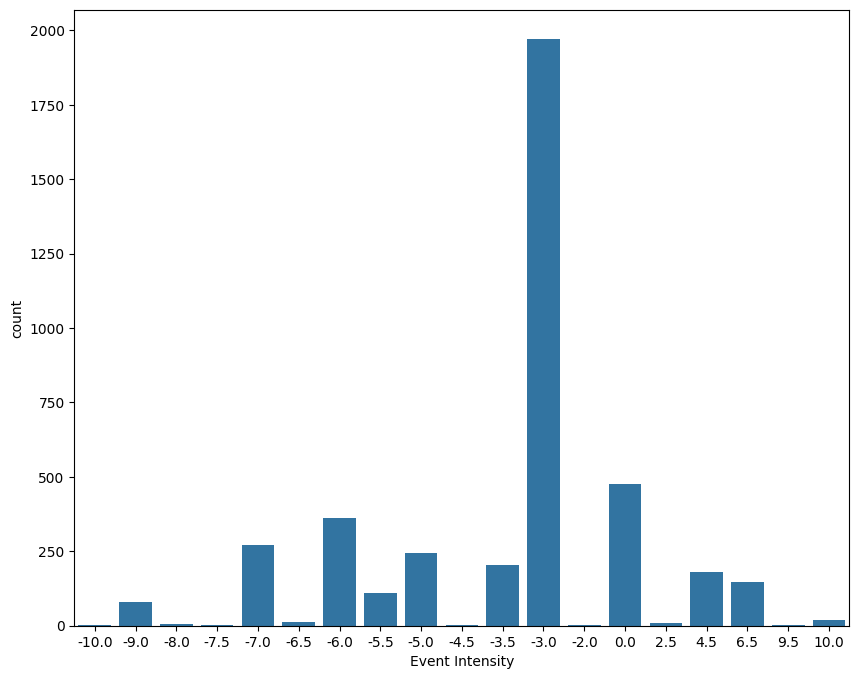

In [11]:
#plot event intensity
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Event Intensity')
plt.show()

In [6]:
df['Event Date'] = pd.to_datetime(df['Event Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Event ID            92 non-null     object        
 1   Event Date          92 non-null     datetime64[ns]
 2   Event Type          92 non-null     object        
 3   Event Intensity     92 non-null     float64       
 4   Quad Code           92 non-null     object        
 5   Contexts            60 non-null     object        
 6   Actor Name          92 non-null     object        
 7   Actor Country       92 non-null     object        
 8   Actor Title         92 non-null     object        
 9   Actor Name Raw      92 non-null     object        
 10  Recipient Name      92 non-null     object        
 11  Recipient Country   64 non-null     object        
 12  Recipient Title     92 non-null     object        
 13  Recipient Name Raw  92 non-null     object        
 

In [48]:
# sort the data by event date
df = df.sort_values(by='Event Date')
df.head()

,Event ID,Event Date,Event Type,Event Intensity,Quad Code,Contexts,Actor Name,Actor Country,Actor Title,Actor Name Raw,Recipient Name,Recipient Country,Recipient Title,Recipient Name Raw,Country,Raw Placename,Publication Date,Language,Version
0,20220103-7002-44B0A250B288_Threaten,2022-01-03,Threaten,-3.5,Verbal Conflict,NaN,Shiromani Akali Dal,India,Political Party,Shiromani Akali Dal,Banwarilal Purohit,India,Governor,Banwarilal Purohit,IND,[PB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
1,20220103-4607-958Df4912178_Accuse,2022-01-03,Accuse,-3.0,Verbal Conflict,NaN,Akhilesh Yadav,India,Party President,Akhilesh Yadav,Bharatiya Janata Party,India,Political Party,Bjp,IND,[UP],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
2,20220103-7081-4Acc724Fc09F_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
3,20220103-0203-15D6B4304172_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
4,20220103-1956-A30E4Dd4B371_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001


In [45]:
df['Actor Country'].value_counts()

Actor Country
India              3101
Pakistan; India      83
India; Pakistan      40
Pakistan             37
Canada               28
United Kingdom       19
Name: count, dtype: int64

In [52]:
df['Event Date']= pd.to_datetime(df['Event Date'])

In [53]:
def calculate_related_event_gaps(df: pd.DataFrame) -> List[int]:
    """
    Calculates the time gap in days between an event and the next subsequent 
    event that involves any of the same principal actors (Actor Name or Recipient Name).
    
    Args:
        df: The DataFrame containing event data for a single country, 
            sorted by 'Event Date'.

    Returns:
        A list of time gaps in days for temporally related event pairs.
    """
   
    event_gaps = []

    # Iterate through all events except the last one
    for i in range(len(df) - 1):
        current_event = df.iloc[i]
        
        # Define the key entities involved in the current event
        current_entities = {current_event['Actor Name'], current_event['Recipient Name']}
        
        # Look ahead for a related event
        for j in range(i + 1, len(df)):
            next_event = df.iloc[j]
            
            # Define key entities involved in the next event
            next_entities = {next_event['Actor Name'], next_event['Recipient Name']}
            
            # Check for shared actors/recipients (Temporal Causality Proxy)
            if current_entities.intersection(next_entities):
                
                # Calculate the time difference in days
                time_diff = (next_event['Event Date'] - current_event['Event Date']).days
                
                if time_diff > 0: # Ensure we only log forward-moving time
                    event_gaps.append(time_diff)
                    break  # Stop at the FIRST related subsequent event
                    
    return [gap for gap in event_gaps if gap is not None]

In [54]:
event_gaps = calculate_related_event_gaps(df)
len(event_gaps)

4073

In [55]:
print("Mean gap:", np.mean(event_gaps))
print("Median gap:", np.median(event_gaps))
print("Max gap:", np.max(event_gaps))

Mean gap: 5.998035845813896
Median gap: 1.0
Max gap: 223


In [57]:
# Determine the percentile that captures most of the causal activity
percentile_threshold = [85, 90, 95, 99]
p_value = [np.percentile(event_gaps, perc) for perc in percentile_threshold]

for i in range(len(p_value)):
    print(f"{percentile_threshold[i]}th Percentile (P-Value): {p_value[i]:.0f} days")

85th Percentile (P-Value): 8 days
90th Percentile (P-Value): 11 days
95th Percentile (P-Value): 22 days
99th Percentile (P-Value): 83 days


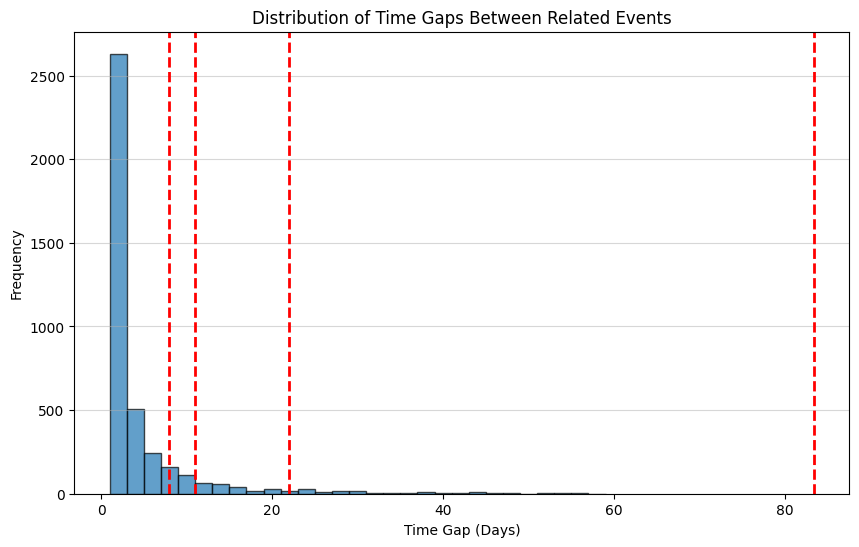

In [58]:
# Visualization
plt.figure(figsize=(10, 6))
plt.hist(event_gaps, bins=range(1, 60, 2), color='#1f77b4', edgecolor='black', alpha=0.7)
for i in range(len(p_value)):
    plt.axvline(p_value[i], color='r', linestyle='dashed', linewidth=2)
plt.title('Distribution of Time Gaps Between Related Events')
plt.xlabel('Time Gap (Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show() 

How do we make the connection between 2 events?

In [ ]:
df.head()

,Event ID,Event Date,Event Type,Event Intensity,Quad Code,Contexts,Actor Name,Actor Country,Actor Title,Actor Name Raw,Recipient Name,Recipient Country,Recipient Title,Recipient Name Raw,Country,Raw Placename,Publication Date,Language,Version
0,20220103-7002-44B0A250B288_Threaten,2022-01-03,Threaten,-3.5,Verbal Conflict,NaN,Shiromani Akali Dal,India,Political Party,Shiromani Akali Dal,Banwarilal Purohit,India,Governor,Banwarilal Purohit,IND,[PB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
1,20220103-4607-958Df4912178_Accuse,2022-01-03,Accuse,-3.0,Verbal Conflict,NaN,Akhilesh Yadav,India,Party President,Akhilesh Yadav,Bharatiya Janata Party,India,Political Party,Bjp,IND,[UP],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
2,20220103-7081-4Acc724Fc09F_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
3,20220103-0203-15D6B4304172_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
4,20220103-1956-A30E4Dd4B371_Request,2022-01-03,Request,0.0,Verbal Conflict,NaN,Supreme Court,NaN,Court Supreme,Supreme Court,Calcutta High Court,India,High Court,Calcutta High Court,IND,[WB],2022-01-03,English,Ngec_Coder-Vers001-B1-Run-001
